In [1]:
import obspy
from obspy.clients.fdsn import Client

In [52]:
region_name = "PuertoRico_threeyear"
center = (-66.5, 18)
horizontal_degree = 3.0
vertical_degree = 2.0
#     starttime = obspy.UTCDateTime("2020-01-07T00")
#     endtime = obspy.UTCDateTime("2020-01-14T00") 
starttime = obspy.UTCDateTime("2018-05-01T00")
endtime = obspy.UTCDateTime("2021-05-01T00") 
client = "IRIS"
network_list = ["*"]
# channel_list = "HH*,BH*,EH*,HN*"
# channel_list = "HH*,BH*,HN*"
channel_list = "HN*"

In [53]:
# starttime= obspy.UTCDateTime("2020-01-22T04:57:44.934")
starttime= obspy.UTCDateTime("2020-01-16T23:27:46.902")
endtime = starttime + 30

In [54]:
config = {}
config["region"] = region_name
config["center"] = center
config["xlim_degree"] = [center[0]-horizontal_degree/2, center[0]+horizontal_degree/2]
config["ylim_degree"] = [center[1]-vertical_degree/2, center[1]+vertical_degree/2]
config["starttime"] = starttime.datetime.isoformat()
config["endtime"] = endtime.datetime.isoformat()
config["networks"] = network_list
config["channels"] = channel_list
config["client"] = client

In [55]:
stations = Client(config["client"]).get_stations(network = ",".join(config["networks"]),
                                       station = "*",
#                                        station = "CELP,GBPR",
                                       starttime=config["starttime"],
                                       endtime=config["endtime"],
                                       minlongitude=config["xlim_degree"][0],
                                       maxlongitude=config["xlim_degree"][1],
                                       minlatitude=config["ylim_degree"][0],
                                       maxlatitude=config["ylim_degree"][1],
                                       channel=config["channels"],
                                       level="response")#,

In [70]:
client = Client("IRIS")
stream = obspy.Stream()
max_retry = 10
for network in stations:
    for station in network:
        print(f"********{network.code}.{station.code}********")
        retry = 0
        while retry < max_retry:
            try:
                tmp = client.get_waveforms(network.code, station.code, "*", config["channels"], starttime, endtime)
#                         for trace in tmp:
#                             if trace.stats.sampling_rate != 100:
#                                 print(trace)
#                                 trace = trace.interpolate(100, method="linear")
#                             trace = trace.detrend("spline", order=2, dspline=5*trace.stats.sampling_rate)
#                             stream.append(trace)
                stream += tmp
                break
            except Exception as err:
                print("Error {}.{}: {}".format(network.code, station.code, err))
                message = "No data available for request."
                if str(err)[:len(message)] == message:
                    break
                retry += 1
                time.sleep(5)
                continue
        if retry == max_retry:
            print(f"{fname}: MAX {max_retry} retries reached : {network.code}.{station.code}")

********GS.PR01********
Error GS.PR01: No data available for request.
Detailed response of server:


********GS.PR02********
Error GS.PR02: No data available for request.
Detailed response of server:


********GS.PR03********
Error GS.PR03: No data available for request.
Detailed response of server:


********GS.PR04********
Error GS.PR04: No data available for request.
Detailed response of server:


********GS.PR05********
Error GS.PR05: No data available for request.
Detailed response of server:


********GS.PR06********
Error GS.PR06: No data available for request.
Detailed response of server:


********IU.SJG********
Error IU.SJG: No data available for request.
Detailed response of server:


********NP.3090********
Error NP.3090: No data available for request.
Detailed response of server:


********NP.3095********
Error NP.3095: No data available for request.
Detailed response of server:


********NP.3096********
Error NP.3096: No data available for request.
Detailed response of se

In [79]:
steam_copy = stream.copy()
# stream = steam_copy.copy()

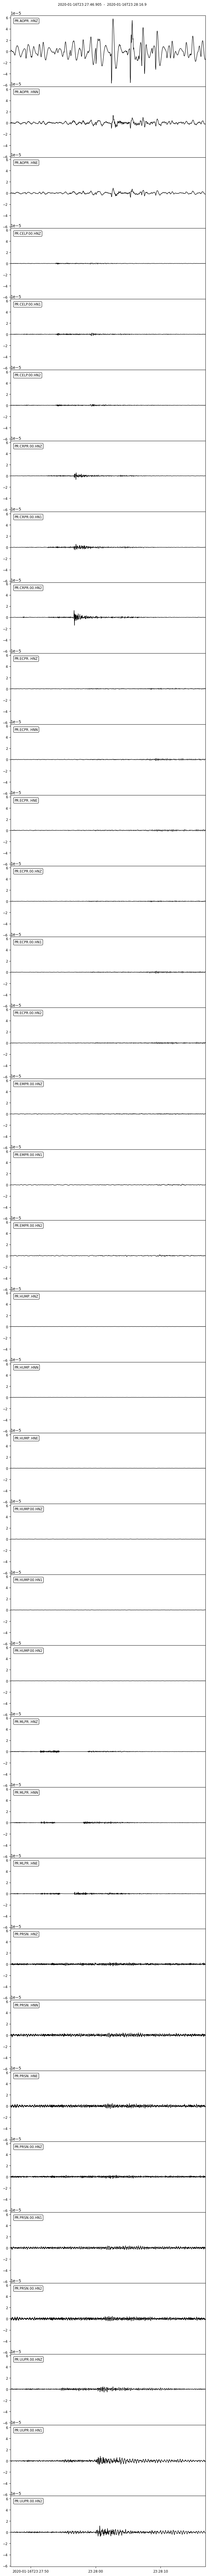

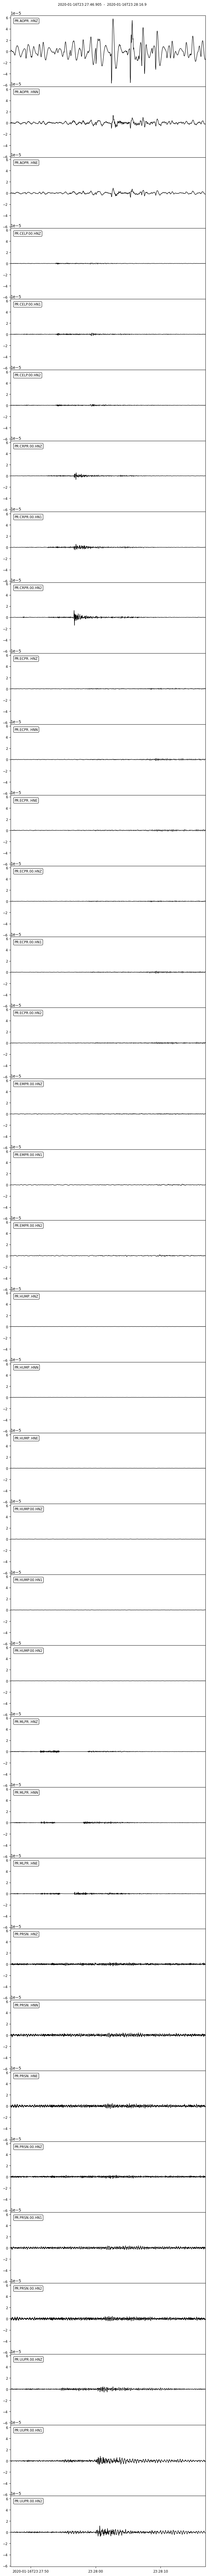

In [80]:
stream.plot()

In [81]:
stream = stream.detrend("spline", order=2, dspline=5*stream[0].stats.sampling_rate)
stream = stream.merge(fill_value=0)

In [82]:
WOODANDERSON = {'poles': [-6.283 + 4.7124j, -6.283 - 4.7124j],
                'zeros': [0 + 0j], 'gain': 1.0, 'sensitivity': 2080}

In [83]:
stations.select(network="PR", station="GBPR")[0][0][0].response

Channel Response
	From m/s**2 (Acceleration in meters per second squared) to counts (Digital Count in Digital counts)
	Overall Sensitivity: 204000 defined at 1.000 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from m/s**2 to V, gain: 0.51
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to counts, gain: 400000
		Stage 4: FIRResponseStage from counts to counts, gain: 1
		Stage 5: FIRResponseStage from counts to counts, gain: 1
		Stage 6: FIRResponseStage from counts to counts, gain: 1

In [84]:
stations.select(network="PR", station="CELP")[0][0][0].response

Channel Response
	From m/s**2 (Acceleration in meters per second squared) to counts (Digital Count in Digital counts)
	Overall Sensitivity: 204000 defined at 1.000 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from m/s**2 to V, gain: 0.51
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to counts, gain: 400000
		Stage 4: FIRResponseStage from counts to counts, gain: 1
		Stage 5: FIRResponseStage from counts to counts, gain: 1
		Stage 6: FIRResponseStage from counts to counts, gain: 1

In [85]:
# stream = stream.remove_response(stations, output="VEL")
stream = stream.remove_sensitivity(stations)
for trace in stream:
    if trace.id.split(".")[-1][:2]=="HN":
        print(trace)
        trace.integrate()
        trace.filter("highpass", freq=5.0)
#         trace.detrend("linear")
#         trace = trace.detrend("spline", order=2, dspline=0.5*trace.stats.sampling_rate)


PR.AOPR..HNE | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.AOPR..HNN | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.AOPR..HNZ | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.CELP.00.HN1 | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.CELP.00.HN2 | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.CELP.00.HNZ | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.CRPR.00.HN1 | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.CRPR.00.HN2 | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.CRPR.00.HNZ | 2020-01-16T23:27:46.910000Z - 2020-01-16T23:28:16.900000Z | 100.0 Hz, 3000 samples
PR.ECPR..HNE | 2020-01-16T23:27:46.905000Z - 2020-01-16T23:28:16.895000Z | 100.0 Hz, 3000 samples
PR.ECPR.

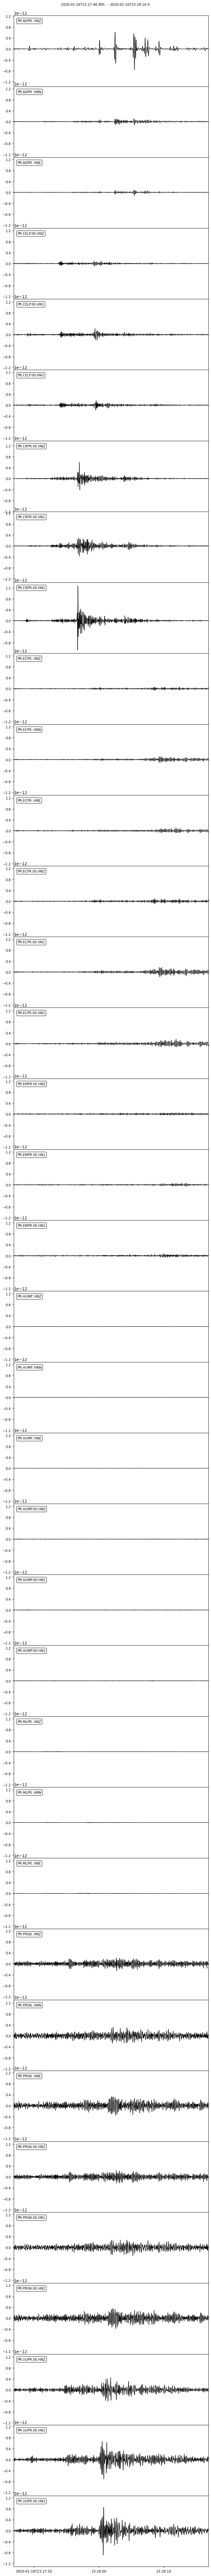

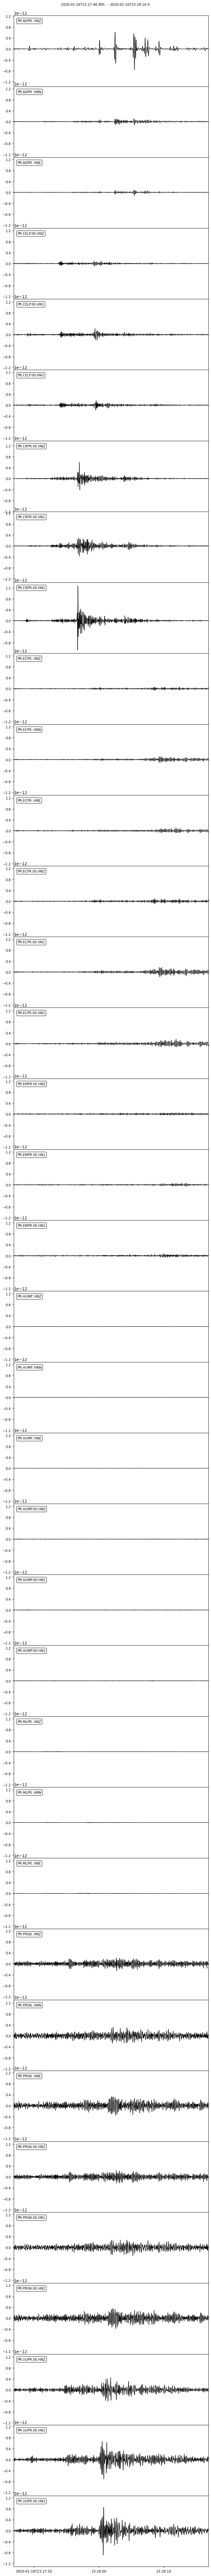

In [86]:
stream.plot()